# **Predicting House Prices**
### **Navneet Rajagopal**
### **PSTAT 131**


# Introduction
This project will create a model to predict housing prices given a set of factors. 

## What is a house?
A house is a place that a person, or a group of people, will live in and claim shelter. It is said the most important purchase a person will make is their house. However, the housing market is hard to predict, there are many factors that influence the cost of a house. There are various factors that will influence the cost of a house location, number of bedrooms, number of bathrooms, heating, etc.
## What are we trying to do?
What factors influence the cost of a house and can we use these factors to create a predictive model that will determine the cost of a house based on these factors? This is the question I will be researching and using the skills learned in this class to come up with an answer to. The data set dataset includes numerical and categorical variables related to various characteristics of a house in the US housing market. Specifically, it includes numerical variables for square feet, bedrooms, stories, and bathrooms, and categorical variables for main road, guest room, basement, hot water heating, and air conditioning. The dataset contains 546 different observations with no missing variables.
## ¿Por Qué? (Why?)
As a college student I have the benefit (to some) of living in an apartment provided by the university. However, as I get older I will need to buy a house and settle down. I am doing this project to help understand the housing market and why the prices are the way they are. Hopefully by the end of this project, I will have a better understanding of how the housing market works and in the future I can reference something I made in college to make my purchase decision. 

<img src="https://i.ytimg.com/vi/G0M3N8nXiF4/hqdefault.jpg?sqp=-oaymwEmCOADEOgC8quKqQMa8AEB-AH-CYAC0AWKAgwIABABGHIgXCg9MA8=&rs=AOn4CLCF4As3DtqSpEMyaY97MUmP9u9j5w" alt="Alternative text" />

# Loading the Dataset

time to load all the data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, auc, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

In [11]:
df1 = pd.read_csv('/users/navneet/downloads/housing.csv')
print(df1.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


this code is from the [house price data set from kaggle](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset). This data set is made by M. Yasser and Kaggle to challenge students to understand machine learning.

# Exploring the Data 

## The Variables
The variables in this dataset are number of bedrooms, number of bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditiioning, parking, preferrred area, furnishing. As we can see, the price, area, bedrooms, bathrooms, stories, and parking are all numerical variables. However the basement, guestoom, mainroad, hotwater, airconditioning, preferred area, and furnished are all catgorical. There are a total of 540 of each factor present in the data set. Since the dataset does not have any duplicates (as mentioned in the source) we will not have to worry about that in the future. However, there are a few changes I do plan to make before we go on.

## Cleaning it up
First I am going to convert the categorical variables into numbers. In the case of mainroad, guestroom, basement, hot water, air conditioning, parking, and preferred area I am turning the yes to 1 and the no to zero. For the furnishing I am turning the status to 0 for unfurnished, 1 for semi-furnished, and 2 for furnished. The change to categorical values with numbers is essential in making a predictive algorthem since yes does not mean anything to the model, but 1 and 0 do.

In [12]:
map_dict = {'no': 0, 'yes': 1}
map_dict2 = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
df1[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']] = \
    df1[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']].replace(map_dict)
df1['furnishingstatus'] = df1['furnishingstatus'].replace(map_dict2)
df1.to_csv('/users/navneet/downloads/housing_cleaned.csv', index=False
)
df = pd.read_csv('/users/navneet/downloads/housing_cleaned.csv')


Next I am going to see if there are any null values and infinite values. If there are any null or infinite values we neet to remove them since it will just be counted as a 0 in the model and skew the dataset. 

In [13]:
missing_values = df.isnull().sum()
print(missing_values)
infinite_values = np.isinf(df).sum()
print(infinite_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


As we can see, there are no values in any of the categories that are counted as either NA or infinite. 

# EDA (Exploratory Data Analysis)

In [14]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


The data seems to all be present. We can very clearly see there are 545 observations in this dataset. The rest of the data is based specifically on the category.

## Understanding Each Variable
* Price- House price in dollars
* Area- Area of the house in Sq. Ft
* Bedrooms - Number of Bedrooms
* Bathrooms - Number of Bathrooms
* Stories - Number of Stories
* Guestroom - Number of Guest Rooms
* Basement - Number of Basements
* Hotwaterheating- if the house has hot water or not (from yes and no changed to 0 for no and 1 for yes)
* Airconditioning - if the house has air-conditioning or not (from yes and no changed to 0 for no and 1 for yes)
* Parking - how many parking spots the house has
* Preferred area - If the house is in a preferred area or not (changed from yes and no to 0 for no and 1 for yes)
* Furnishingstatus- if the house is furnished or not (changed from furnished, semi furnished, and not furnished to 0 for not, 1 for semi, and 2 for furnished)


## Checking the correlation between the values

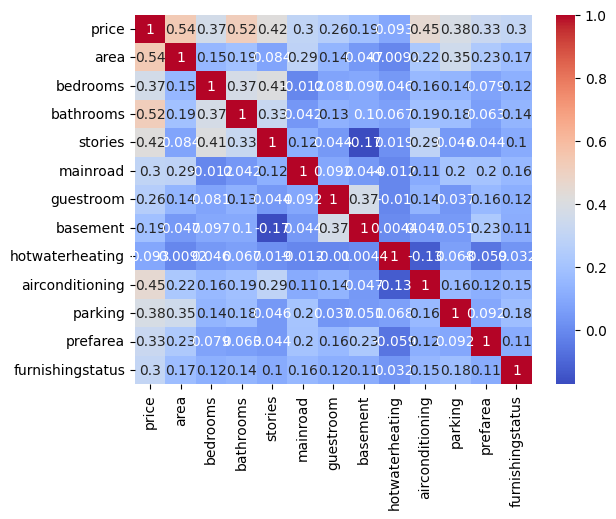

In [15]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

There seems to be a correlation between area and price, bathrooms and price, and airconditioning and price. This correlation appears to be mild, with the maximum beign only 0.54. I do not think it is neccasry for us to drop any variables due to the correlation but we will have to see later in the project if there is any real problems (with accuracy) given this. 

The data that is correlated makes sense, such as area and bedrooms, and bathrooms all being impactful on the dataset. Based on previous knowledge these are some very important factors that the average family takes into consideration when buying a house. 

## Checking the distribution between all the numerical variables

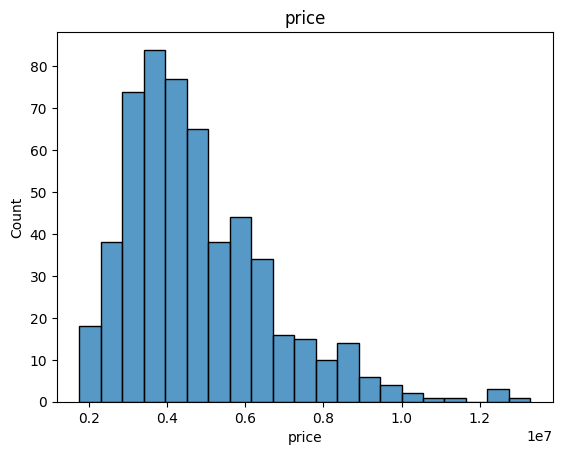

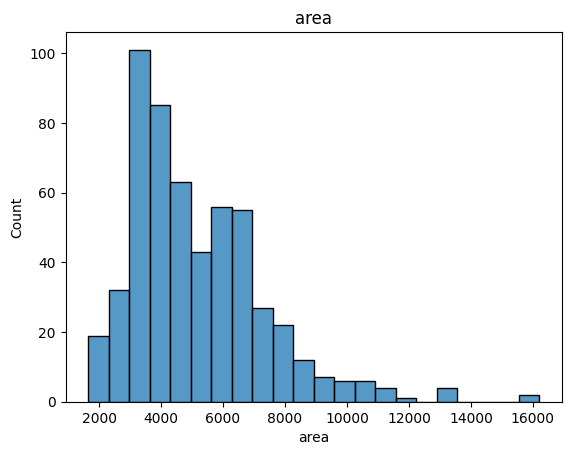

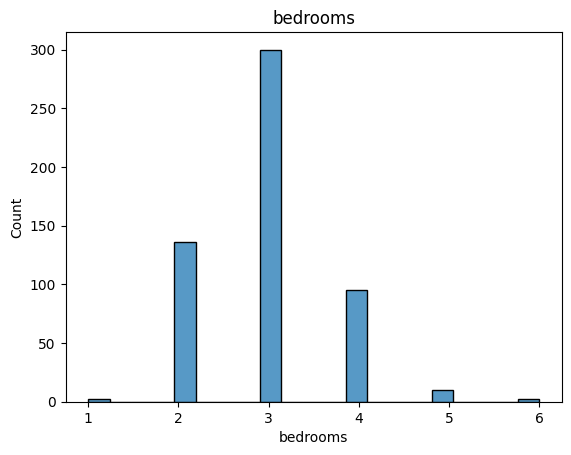

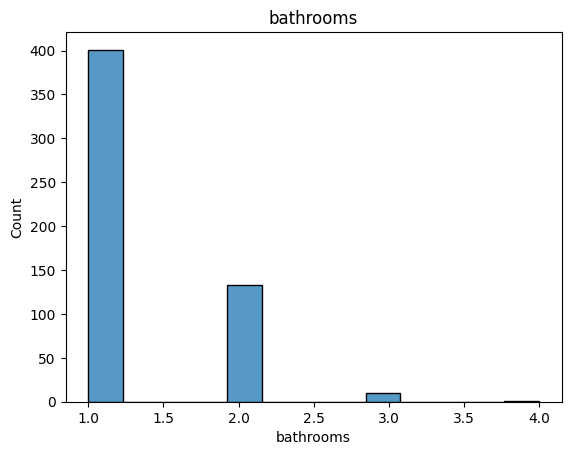

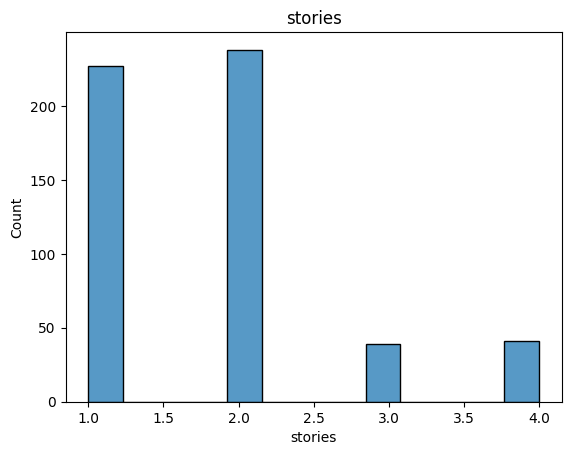

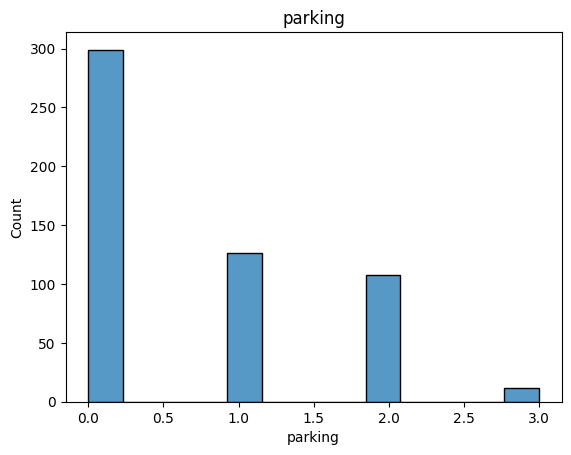

In [16]:
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for var in num_vars:
    sns.histplot(df[var])
    plt.title(var)
    plt.show()

Looking at this it is interesting to see. Variables like parking, stories, bathrooms, and bedrooms are not continuous variables. This is just as expected since no house is ever reported to have, for example, 0.73 of a bathroom. The other variables in price and area are continous which also makes sense since there is an infinite number of possibiities that either of these variables can be. Overall, there is nothing out of place with this dataset.

## Showing the relationship of every variable to the prediction variable (price)

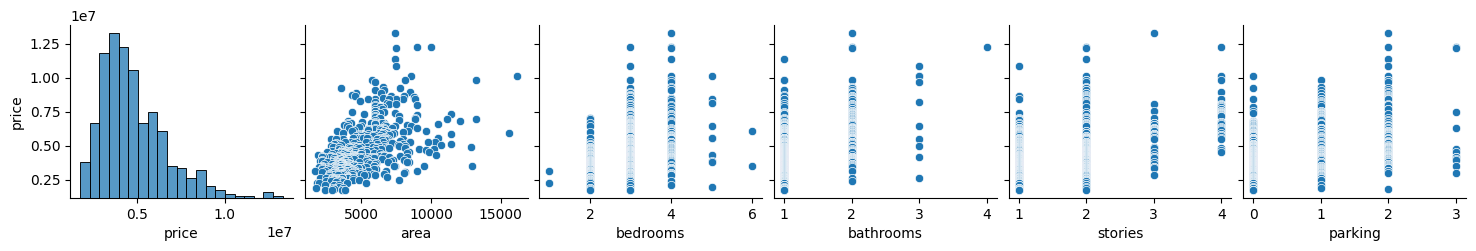

In [17]:
sns.pairplot(df, x_vars=num_vars, y_vars=['price'])
plt.show()

These graphs generally tend to make sense. Such as as area increase the trend is that price increases. The rest of the variables seem to have less of an impact on the price.

## Showing the relationship of every categorical variable and prediciton variable (price)

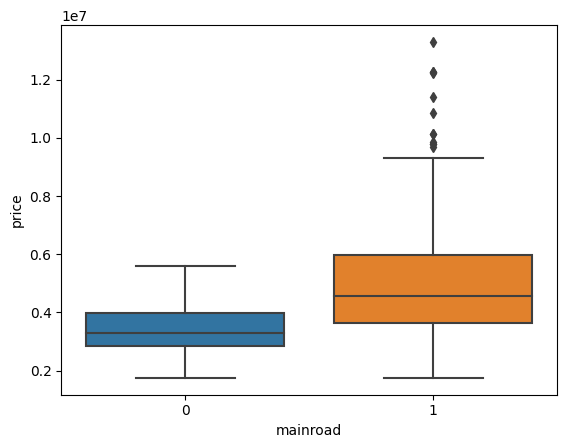

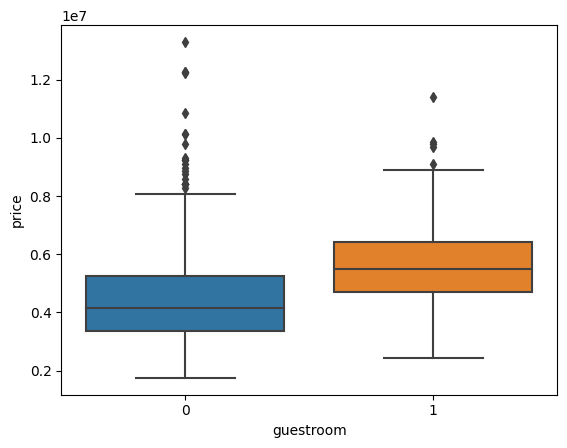

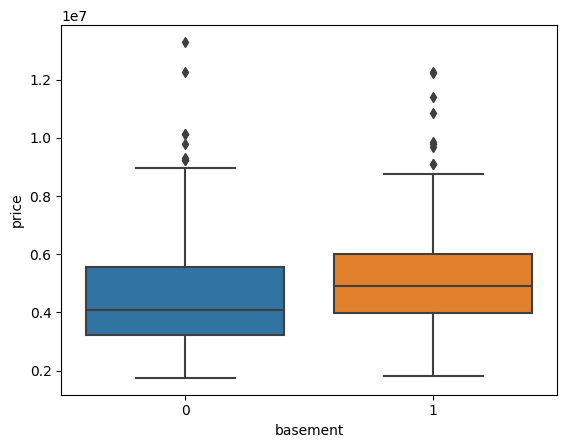

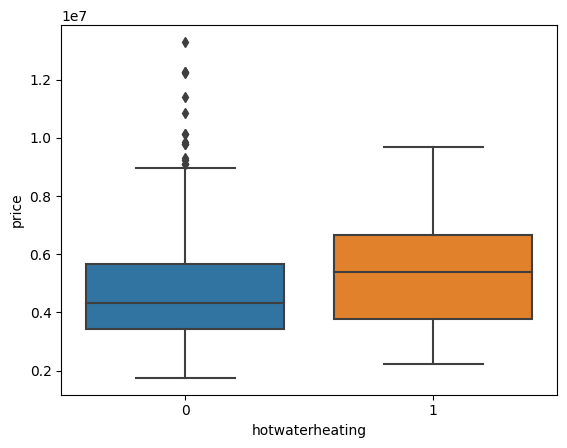

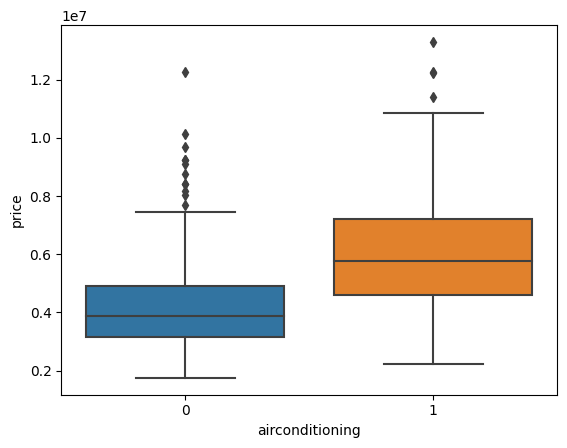

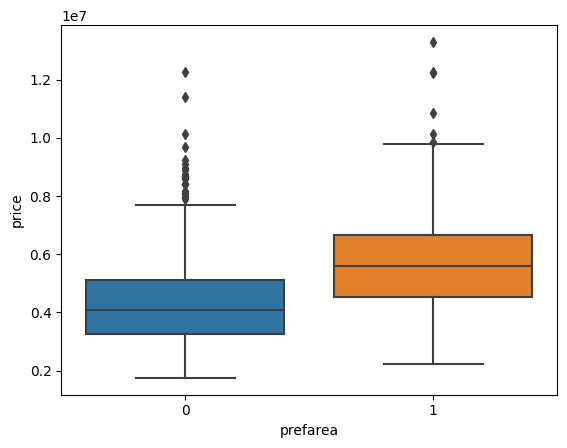

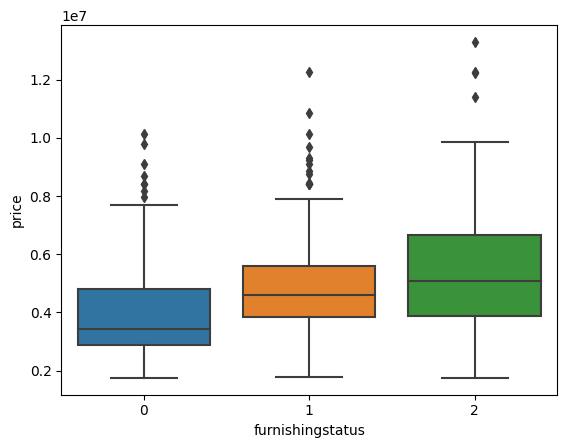

In [18]:
cat_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for var in cat_vars:
    sns.boxplot(x=var, y='price', data=df1)
    plt.show()

Based on my analysis, the categorical variables dont really seem to have an impact on the price. While there is a slight difference, the general trend does not seem to appear. 

# Setting up the models

## Python vs R.


While this class is taught in R, I wanted to do my project in Python. There are steps in R that are not required in python so there will be no recepie or workflow. The fitting of the model is written into the chunk of code, and so on. There are other things that you will see in the future. For example, we fit our training and testing data in the model to see the R^2 value and RMSE, since python doe not have a way of giving those values without applying the testing data. 

Looking at the code for the models there is a parameter grid for all of them. This grid is used to establish the grid for the model, the same exact concept happens in R. Where it differs from R is in the grid is then fit into the model using the gridsearch rather than the tuning that is there in R. R also requires us to create a recepie defining the interactions in the model, that isn't needed in python. Python we can just run the function using the sklearn library. 

<img src="https://cdn.sanity.io/images/18mnrgbb/production/1a45fa3a95882048c0cb85cccbd169c568343dcc-2400x1296.jpg?w=2400&h=1296&auto=format" alt="Alternative text" />

## Splitting the models

I am splitting the model of price into a training and testing set. The reason why I am doing this is we plan to predict the value of price, so that should be split. We will be using the training set to train our model to be accurate to what we want and then we can use the testing set later to find out how accurate our model is. 

In [19]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Random Forest Model

### Understanding the perameter
* n_estimators: the number of trees in the random forest algorithm.
* max_depth: the maximum depth of each decision tree in the random forest. This parameter controls the complexity of the trees and can help prevent overfitting. 
* min_samples_split: the minimum number of samples required to split an internal node in a decision tree. This parameter controls the granularity of the split decisions and can also help prevent overfitting. 
* min_samples_leaf: the minimum number of samples required to be at a leaf node in a decision tree. This parameter controls the size of the leaves and can also help prevent overfitting.

In [20]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print('RMSE:', rmse)
print('R²:', r2)

RMSE: 1359902.9051353866
R²: 0.5705601696736402


This model is pretty accurate, but looking below there are better models.

## Regression Model

### Understanding the Paramters
* fit_intercept: a value indicating whether or not to include an intercept term in the linear regression model. If True, the model will have an intercept term. If False, the intercept term will be set to 0. 
* positive: a value indicating whether or not to constrain the coefficients to be non-negative. If True, the coefficients will be constrained to be non-negative. If False, there will be no constraint on the coefficients.
* copy_X: a value indicating whether or not to make a copy of the input data. If True, the input data will be copied. If False, the input data will be modified in place.

In [21]:
model1 = LinearRegression()
param_grid1 = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False],
}
model1 = LinearRegression()
grid_search1 = GridSearchCV(model1, param_grid=param_grid1, cv=10, scoring='neg_mean_squared_error')
grid_search1.fit(X_train, y_train)
best_model1 = grid_search1.best_estimator_
y_pred1 = best_model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred1)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred1)
print('RMSE:', rmse)
print('R²:', r2)

RMSE: 1240817.9548637983
R²: 0.6424780932986539


This model is the mosts accurate

## KNN Model

### Understanding the Peramters
* n_neighbors: an value indicating the number of nearest neighbors to consider when making a prediction. 

In [22]:
param_grid3 = {'n_neighbors': range(1, 21)}
model3 = KNeighborsClassifier()
grid_search3 = GridSearchCV(model3, param_grid=param_grid3, cv=5, scoring='accuracy')
grid_search3.fit(X_train, y_train)
best_model3 = grid_search3.best_estimator_
y_pred3 = best_model3.predict(X_test)
mse = mean_squared_error(y_test, y_pred3)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred3)
print('Best k:', best_model3.get_params()['n_neighbors'])
print('RMSE:', rmse)
print('R²:', r2)

Best k: 20
RMSE: 2153353.177310855
R²: -0.07675538007905103


This model is not at all accurate. The R^2 value comes out as negative which means there is no relationship between the model made and the predicted values. While KNN is applicable to a prediction model like this, it seems to be more accurate in classification models. This is especially seen here where we have a negative R^2 value which means the data is not at all accurate.

## Boosted Trees Model

### Understanding the Parameters
* n_estimators: a value indicating the number of trees in the XGBoost model. The grid specifies three possible values: 100, 500, and 1000.
* learning_rate: a value indicating the shrinkage rate at each boosting iteration. This parameter controls the contribution of each tree to the final model and can help prevent overfitting
* max_depth: an value indicating the maximum depth of each tree in the XGBoost model. This parameter controls the complexity of the trees and can help prevent overfitting.
* subsample: a value indicating the fraction of samples to be used for each tree. This parameter controls the variance of the model and can help prevent overfitting.
* colsample_bytree: a float value indicating the fraction of features to be used for each tree. This parameter controls the diversity of the model and can help prevent overfitting.

In [23]:
model4 = xgb.XGBRegressor(objective='reg:squarederror')
param_grid4 = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9]
}
grid_search4 = GridSearchCV(model4, param_grid=param_grid4, cv=5, scoring='neg_mean_squared_error')
grid_search4.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], verbose=False)
best_model4 = grid_search4.best_estimator_
y_pred4 = best_model4.predict(X_test)
mse = mean_squared_error(y_test, y_pred4)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred4)
print('RMSE:', rmse)
print('R²:', r2)

RMSE: 1243160.84218131
R²: 0.6411266874151469


This model is pretty good and almost as accurate as the linear regression model

## What happened.
Based on the RMSE values, the lowest one is with the general regresison line. The R^2 value is also at its highest in the regression model. This means that the best model to fit the data to is the generalized regression model. Outside of the KNN model, all the other models have similar performances. The outlier in this data fitting is the KNN model. The KNN model performed horribly with a negative R^2 value. While this is seemingly impossible with a squared value coming out as negative, my theory is that the mdoel is not at all accurate and therefore there is no fit. As mentioned before, I think this is because KNN is more useful in classification models and not prediction models like this. 

# Model Visualizations

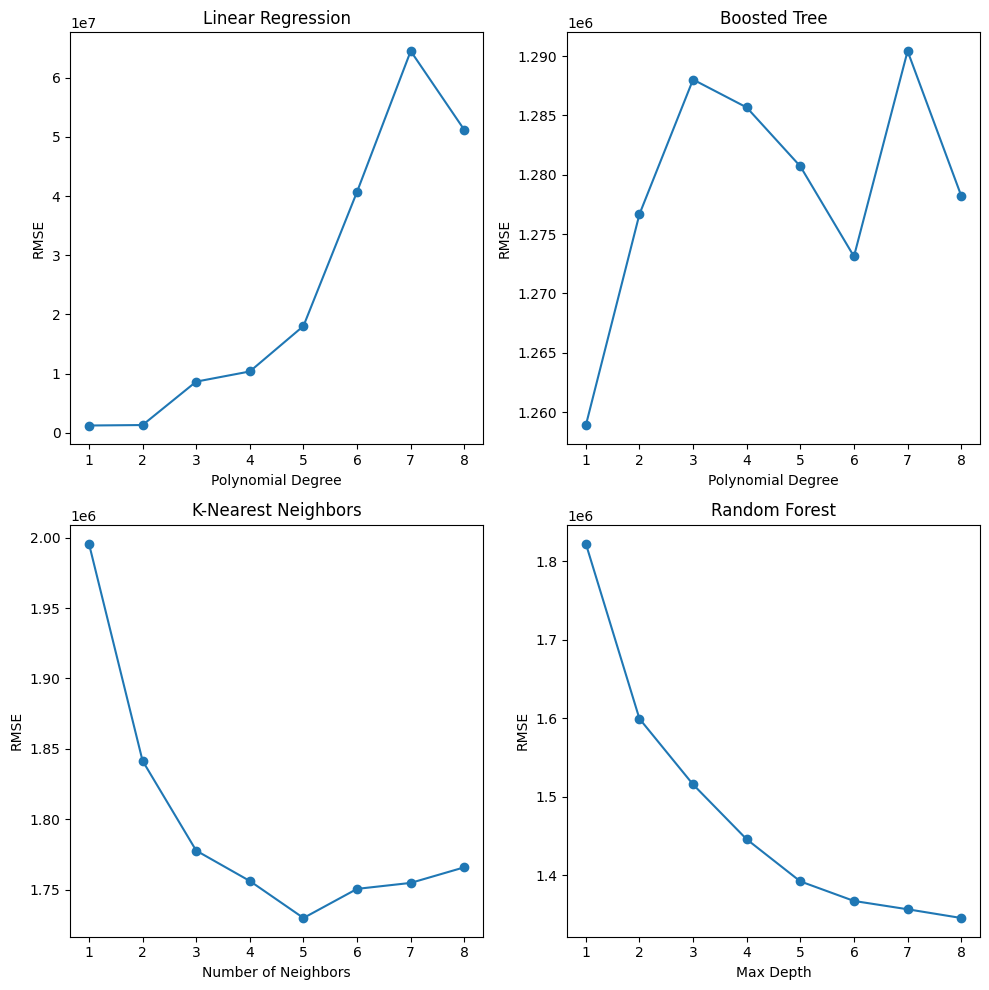

In [24]:
rmse_lr = []
for degree in range(1, 9):
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    y_pred = model.predict(X_poly_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_lr.append(rmse)

rmse_bt = []
for i in range(1, 9):
    model_bt = GradientBoostingRegressor(max_depth=3, n_estimators=100, learning_rate=0.1, random_state=42)
    polynomial_features = PolynomialFeatures(degree=i)
    x_poly_bt = polynomial_features.fit_transform(X_train)
    model_bt.fit(x_poly_bt, y_train)
    x_poly_test_bt = polynomial_features.fit_transform(X_test)
    y_pred_bt = model_bt.predict(x_poly_test_bt)
    rmse_bt.append(mean_squared_error(y_test, y_pred_bt, squared=False))

rmse_knn = []
for n_neighbors in range(1, 9):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_knn.append(rmse)

rmse_rf = []
for depth in range(1, 9):
    model = RandomForestRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_rf.append(rmse)

# Plot RMSE values for all four models
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].plot(range(1, 9), rmse_lr, marker='o')
axs[0, 0].set_xlabel('Polynomial Degree')
axs[0, 0].set_ylabel('RMSE')
axs[0, 0].set_title('Linear Regression')
axs[0, 1].plot(range(1, 9), rmse_bt, marker='o')
axs[0, 1].set_xlabel('Polynomial Degree')
axs[0, 1].set_ylabel('RMSE')
axs[0, 1].set_title('Boosted Tree')
axs[1, 0].plot(range(1, 9), rmse_knn, marker='o')
axs[1, 0].set_xlabel('Number of Neighbors')
axs[1, 0].set_ylabel('RMSE')
axs[1, 0].set_title('K-Nearest Neighbors')
axs[1, 1].plot(range(1, 9), rmse_rf, marker='o')
axs[1, 1].set_xlabel('Max Depth')
axs[1, 1].set_ylabel('RMSE')
axs[1, 1].set_title('Random Forest')
plt.tight_layout()
plt.show()


What thisis doing is finding the rmse for each of the depths or levels in each model. Then we are plotting the rmse against the depths to see which model performed the best and at which specific level. 

Looking at the models plotted, we can use this as further evidence that the best regression fits the data the better than the other models. The general trend is that as random forest gets more depth, it gets better at predicting the model. However, the only model predicts the model with the lowest (overall) RMSE value is the  Regression model. This makes sense given the overall housing market is based off a group of predictors and they will have a direct effect on the price. 

The reason the code is specifically run like this is because we need to loop the equation over and over for each iteration that we want to test. That is the reason we have to redefine model each time and cannot use the one defined earlier. Unlike R that is able to automattically do this with the 'autoplot' function, python needs to manually calculate the rmse each time and then we can plot it against the depth of the model or the polynomial degree. 

# Results of the Best Model

In [25]:
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print('RMSE:', rmse)
print('R²:', r2)

RMSE: 1238970.4429194627
R²: 0.6435419628959107


When we apply the testing set to the data we can see the RMSE is lower and the R^2 is even higher. This means that the model we created is better at predicting the testing data. 

<img src="https://charatoon.com/photo/4707.png" alt="Alternative text" />

### importance graph

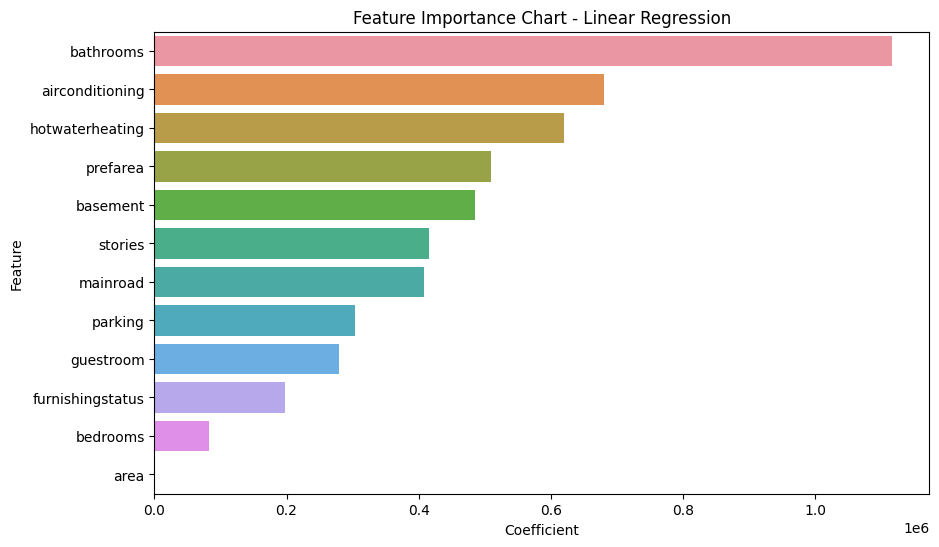

In [26]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
coef = pd.Series(lr_model.coef_, index=X_train.columns)
imp_coef = coef.sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=imp_coef.values, y=imp_coef.index)
plt.title("Feature Importance Chart - Linear Regression")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()

Since this is a linear regression model, we can see that the bathrooms are the most influential part of the model. The next being airconditioning and hot water heating. The area however has a 0 value, this doesn't mean it is not important. However, this can imply that there is too much of a correlation between area and price. The meathod I am using for this is taking the coefficients from the regresion line and using that to determine the importance that each factor has. In theory the larger the absolute value of the coefficient the more important the factor is in the model 

### Predicted vs Actual

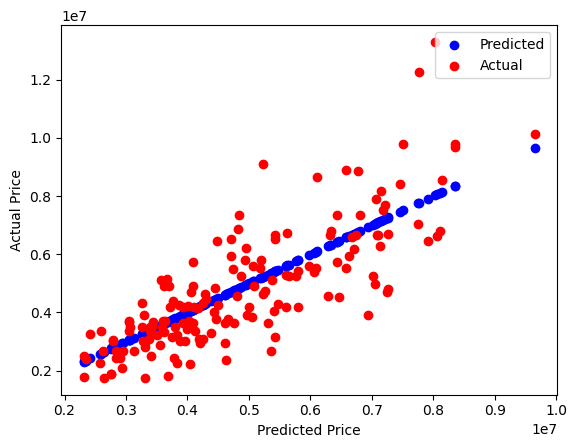

In [27]:
plt.scatter(y_pred, y_pred, color='blue', label='Predicted')
plt.scatter(y_pred, y_test, color='red', label='Actual')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.legend()
plt.show()


As we see, there is a good amount of the data that does fit the model. I feel like the general data is spread out so much and there is a lot of variance in prices that the model is the best it can be without significantly altering the dataset or limiting the scope of what we are trying to predict. 

# Conclusions

Now that we have fitted all the models to the data set and made graphs of everything we can see that the best model for predicting our data was the linear regression model. This data had an R^2 value of 0.64 which is pretty good. This no surprise since the house market is made up of a bunch of factors that will have a mostly linear relationship with the price. However, with every model there is a really high RMSE, this is probably due to the fact that the prices of each house being in the hundreds of thousands and millions of dollars but it still is not a good sign to see a really high RMSE value. 

The model that did the worst was the KNN model. This again makes sense since KNN is better with classification models. Furthermore, there are a lot of predictiors so KNN will have a hard time fitting everything. If we were to lower the number of predictors, and thus have a lower dimension the model would do significantly better. 

An area of improvement may be narrowing down the houses. There seems to be such a huge spread of data in terms of the price of the house that there are probably more factors to consider outside of just the factors we have. Some of the houses could've been sold when a school year just ended and parents wanted to sell their house. Other houses may have been sold when the house market was booming so the market is slightly inflated. There are a lot of other factors that come into play and would complicate the model quite a bit. 

One are that surprised be is the importance graph. While linear regression graphs do not have the same type of importance graphs that the Boosted Trees and Random forest models do, taking the coefficients of each of the factors and plotting it should give us a similar level of understanding on which factors effect price the most. I thought area would have a huge impcat on the cost of a house, however it seems to not have that effect since it is the lowest. Also bedrooms was significantly lower than I thougt. My general theory was that housing prices are influenced first and foremost by their area, but my theory was wrong based on this data. 

If I continued this project, or were to do it differently next time I would choose data from the same location and all around the same time frame. This would, hopefully, lower the impact that outside factors had and would give a more optimal, lab-like, condition. It would also be interesting to see if different markets have different responses to these predictors. Maybe in LA the airconditioning would be much more useful compared to Alaska. The differences that other markets would bring would add a certain level of complexity but would be useful in truly understanding my data. 

The final thing I would like to comment about was using python for this project. While R is very capable of doing machine learning, I felt like python was a much more streamlined process. The concept of a recepie does not exist in python and you can use a single line of code to accomplish much of what R can do in several lines. The whole process was also smoother. While Jupyter Notebook has a few bugs and errors (on a similar level to R), doing everything in a .py file first let me avoide a lot of the issues that R is known to have (crashes and other minor problems.)

Overall, I throughly enjoyed this project and it helped me understand machine learning in a way that was applicable to the real world. 

<img src="https://media4.giphy.com/media/UqqVRaP8y4uo1GNxbN/giphy.gif" alt="Alternative text" />